## Loan Eligibility Prediction 

Loan eligibility is defined as a set of criteria basis which a financial institution evaluates to decide the eligiblity of a customer for a particular loan.

**Criterias**<br>
Loan amount, Dependents, Marital Status, Applicant Income, Laon amount term, Co-applicant income, Gender, Credit History, Property Area

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Loan Train.csv")

### Column Details
==========================
1. Loan_ID : Unique Loan ID
2. Gender : Male/ Female
3. Married : Applicant married (Y/N)
4. Dependents : Number of dependents
5. Education : Applicant Education (Graduate/ Under Graduate)
6. Self_Employed : Self employed (Y/N)
7. ApplicantIncome : Applicant income
8. CoapplicantIncome : Coapplicant income
9. LoanAmount : Loan amount in thousands of dollars
10. Loan_Amount_Term : Term of loan in months
11. Credit_History : Credit history meets guidelines yes or no
12. Property_Area : Urban/ Semi Urban/ Rural
13. Loan_Status : Loan approved (Y/N) this is the target variable

In [4]:
print(df.to_string())

      Loan_ID  Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
0    LP001002    Male      No          0      Graduate            No             5849           0.000000         NaN             360.0             1.0         Urban           Y
1    LP001003    Male     Yes          1      Graduate            No             4583        1508.000000       128.0             360.0             1.0         Rural           N
2    LP001005    Male     Yes          0      Graduate           Yes             3000           0.000000        66.0             360.0             1.0         Urban           Y
3    LP001006    Male     Yes          0  Not Graduate            No             2583        2358.000000       120.0             360.0             1.0         Urban           Y
4    LP001008    Male      No          0      Graduate            No             6000           0.000000       141.

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Total Number Of Rows And Column

In [7]:
df.shape

(614, 13)

In [8]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  614
Number of Columns:  13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Some values are missing from some of the columns.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


**How 'Credit history' affects the 'Loan status'?**

In [11]:
# Using crosstab() to established relationship
# This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and 
# an aggregation function are passed.
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Data Visualization

<Axes: >

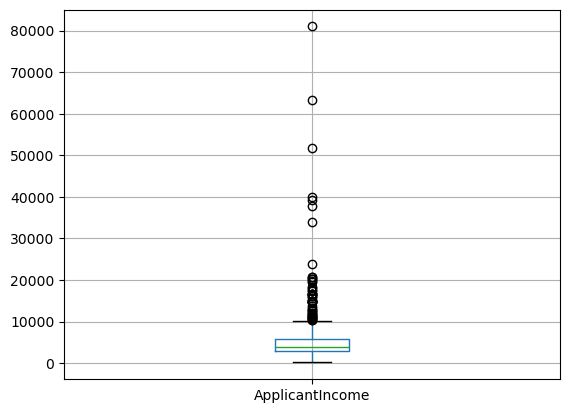

In [12]:
# Applicant Income using boxplot, as it helps in identifying outliers in the dataset.
df.boxplot(column='ApplicantIncome')

<Axes: >

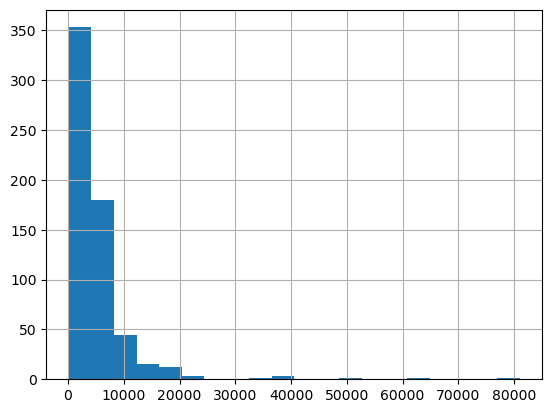

In [13]:
# Histogram
df['ApplicantIncome'].hist(bins=20)

<Axes: >

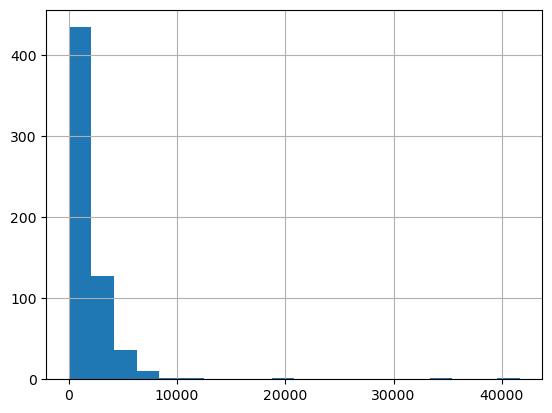

In [14]:
# Coapplicant Income
df['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

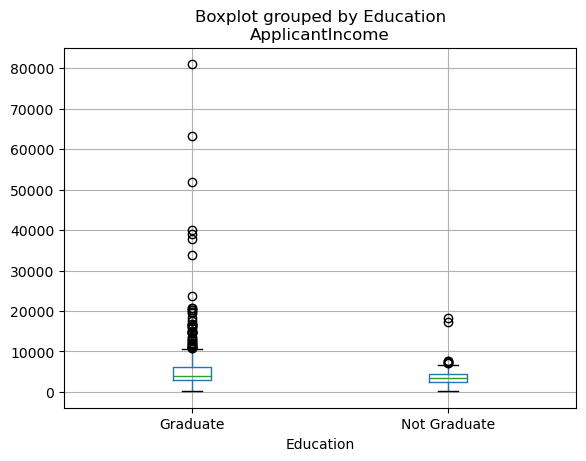

In [15]:
# Now, Let's explore relantionship between applicantIncome and their education through boxplot
df.boxplot(column='ApplicantIncome', by='Education')

>- Median Salary doesn't vary too much for Graduate vs Not Graduate.<br>
>- But Some of the Graduates have very high Salary.This kind of variation is quite common.<br>
>- But Normalising and Scaling these value is one important step we've to follow and implement for pre-processing.

<Axes: >

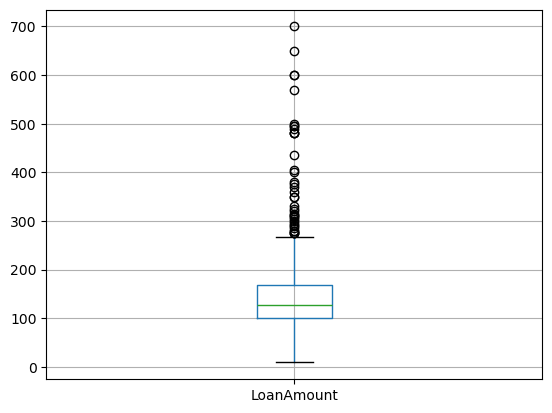

In [16]:
# Loan Amount
df.boxplot(column='LoanAmount')

<Axes: >

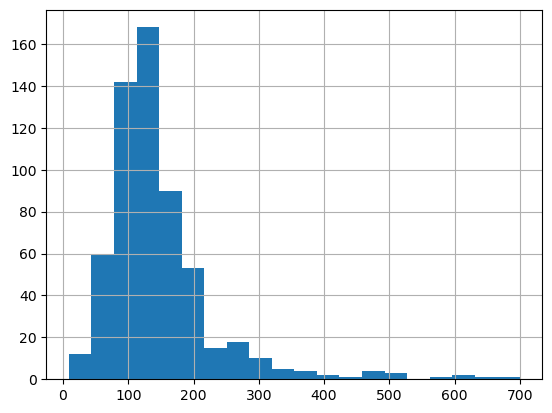

In [17]:
#Let's also draw histogram for loan amount variant
df['LoanAmount'].hist(bins=20)

### Normalising right skewed data.

- We'll be using **Log function**.

<Axes: >

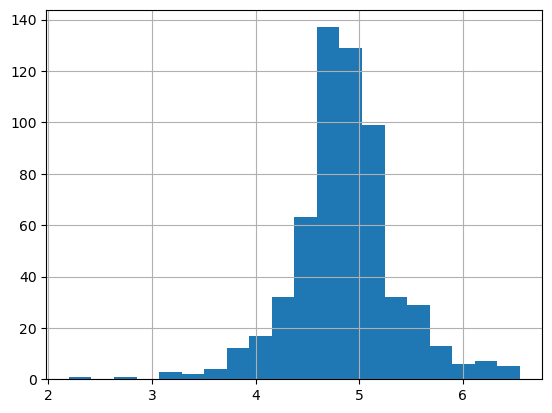

In [18]:
# Normalizing Loan Amount
df['LoanAmount_log'] = np.log(df['LoanAmount'])
# Visualizing LoanAmount_Log
df['LoanAmount_log'].hist(bins=20)

### Look for missing values

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

### Handling missing values

**Gender**

In [20]:
# Since Gender is a categorical variable, we will be using mode function
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

**Married**

In [21]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

**Dependent**

In [22]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

**Self_Employed**

In [23]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

**LoanAmount & LoanAmount_log**

In [24]:
# It is not a categorical value, but a quantitative value. Hence we will be using mean() to replace the missing value
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

**LoanAmount_Term**

In [25]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

**Credit_History**

In [26]:
# It is in 0 and 1.
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [27]:
# Let's check if the missing values are handled or not
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

- All missing values are handled.

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109


In [32]:
df.to_csv("Exported Loan Test.csv", index=False)

In [ ]:
# ApplicantIncome and CoapplicantIncome, both are right skewed. Instead of normalizing them separately, 
# we will be combining them and then log over the total value
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [ ]:
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df.head()

### Dividing dataset into Dependent (y) and Independent variables (X)

In [ ]:
# X represent all the independent variables
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values 
# y is the dependent variable that we need to predict, which is the 'loan status' column at 12th index
y = df.iloc[:,12].values

## What is the difference between NP R_ and NP C_?

1. np. c_[] concatenates arrays along second axis. (column)
2. np. r_[] concatenates arrays along first axis. (row)

In [ ]:
X

In [ ]:
y

### Split dataset into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
# test_size=0.2 # as we want 80% data for training the model
# random_state = 0 # as we want the same result to change in every cycle. If not given zero, it will keep changing 

In [ ]:
print(X_train)

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [ ]:
# Let use fit_tranform() func. of LabelEncoder() class to convert the indexes we want from String to numeric format
for i in range(0, 5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [ ]:
# similarly, do that for 7th index
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [ ]:
X_train

**Let's encode y_train now**

In [ ]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [ ]:
y_train

In [ ]:
# Encoding test data now
X_test

In [ ]:
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [ ]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [ ]:
y_test = labelencoder_y.fit_transform(y_test)

In [ ]:
X_test

In [ ]:
y_test

### Scaling (since different columns have different range)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Creating Model (by applying Algorithm on the dataset)

**1. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion ='entropy', random_state=0)
DTClassifier.fit(X_train,y_train)

In [ ]:
y_pred = DTClassifier.predict(X_test)
y_pred

In [ ]:
# Calculating accuracy of the prediction
from sklearn import metrics
print('The accuracy of the decision tree is: ', metrics.accuracy_score(y_pred,y_test))

**2. Naive_Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

In [ ]:
y_pred = NBClassifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred,y_test))

**Now, import test dataset, which don't have 'loan status' column.**

In [ ]:
testdata = pd.read_csv("Loan Test.csv")

In [ ]:
print(testdata.to_string())

In [ ]:
testdata.head()

In [ ]:
testdata.tail()

### Total Number Of Rows And Column

In [ ]:
testdata.shape

In [ ]:
print("Number Of Rows: ", testdata.shape[0])
print("Number Of Columns: ", testdata.shape[1])

### Naive_Bayes Algorithm to predict.

In [ ]:
testdata.info()

- Okay, this also has some missing values.

In [ ]:
# Handling those misssing values
testdata.isnull().sum()

In [ ]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)

In [ ]:
testdata.isnull().sum()

In [ ]:
testdata.boxplot(column='LoanAmount')

In [ ]:
testdata.boxplot(column='ApplicantIncome')

In [ ]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [ ]:
testdata.isnull().sum()

In [ ]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [ ]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log'] = np.log(testdata['TotalIncome'])

In [ ]:
testdata.head()

In [ ]:
# Spiltting dataset into X and y
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [ ]:
# Encoding
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [ ]:
# 7 index as well
test[:,7] = labelencoder_X.fit_transform(test[:,7])

In [ ]:
test

- All textual value is converted into numeric now.

In [ ]:
# Scaling test data
test = ss.fit_transform(test)  # Instances have already been created while training the model

**Using Naive Bayes Algo to predict for test dataset**

In [ ]:
pred = NBClassifier.predict(test)

In [ ]:
pred  

- 1 - eligible
- 0 - not eligible